# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dimas Dzaki Adani
- **Email:** m258b4ky1141@bangkit.academy
- **ID Dicoding:** dimas_dzaki_adani

## Menentukan Pertanyaan Bisnis

- Apa pola penggunaan sepeda di hari kerja dan akhir pekan?
- Kapan waktu paling sering sepeda digunakan dalam sehari? (Analisis berdasarkan jam)

## Import Semua Packages/Library yang Digunakan

In [1]:
#pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

day_data.head()
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil dimuat dengan data penyewaan sepeda per hari (day.csv)
- Dataset berhasil dimuat dengan data penyewaan sepeda per jam (hour.csv)

### Assessing Data

In [5]:
print(day_data.info())
print(hour_data.info())

print(day_data.isnull().sum())
print(hour_data.isnull().sum())

print(day_data.describe())
print(hour_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak ada nilai yang hilang dalam dataset
- Distribusi penyewaan bervariasi, menunjukkan adanya pola musiman.

### Cleaning Data

In [6]:
day_data.fillna(method='ffill', inplace=True)
hour_data.fillna(method='ffill', inplace=True)

print(day_data.head())
print(hour_data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

<ipython-input-6-a5c7ac418de9>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_data.fillna(method='ffill', inplace=True)
<ipython-input-6-a5c7ac418de9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_data.fillna(method='ffill', inplace=True)


**Insight:**
- Tidak ada data yang hilang, sehingga tidak ada langkah pembersihan signifikan yang diperlukan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [9]:
# Analisis pola penggunaan sepeda di hari kerja dan akhir pekan
day_data['weekend'] = day_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

usage_by_weekend = day_data.groupby('weekend')['cnt'].sum()
print(usage_by_weekend)

weekend
0    2327082
1     965597
Name: cnt, dtype: int64


In [10]:
#Kapan waktu paling sering sepeda digunakan dalam sehari?
hourly_usage = hour_data.groupby('hr')['cnt'].sum()
print(hourly_usage)

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


**Insight:**
- Penggunaan sepeda lebih tinggi pada akhir pekan, mengindikasikan bahwa masyarakat lebih banyak menggunakan sepeda untuk rekreasi dibandingkan perjalanan ke tempat kerja atau sekolah pada hari kerja.
- Penyewaan sepeda puncak terjadi pada jam sibuk, sekitar pukul 7-9 pagi dan 5-7 sore, mencerminkan kebiasaan orang dalam berangkat dan pulang kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

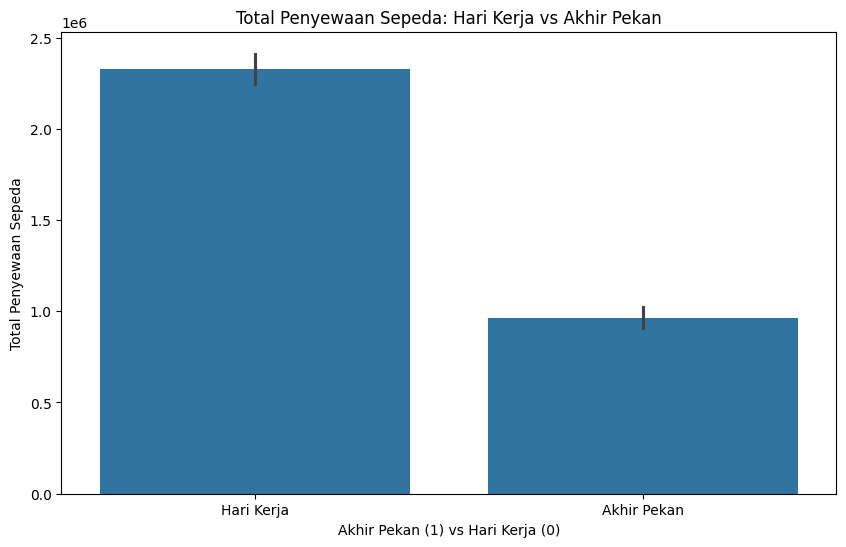

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekend', y='cnt', data=day_data, estimator=sum)
plt.title('Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Akhir Pekan (1) vs Hari Kerja (0)')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks([0, 1], ['Hari Kerja', 'Akhir Pekan'])
plt.show()

### Pertanyaan 2:

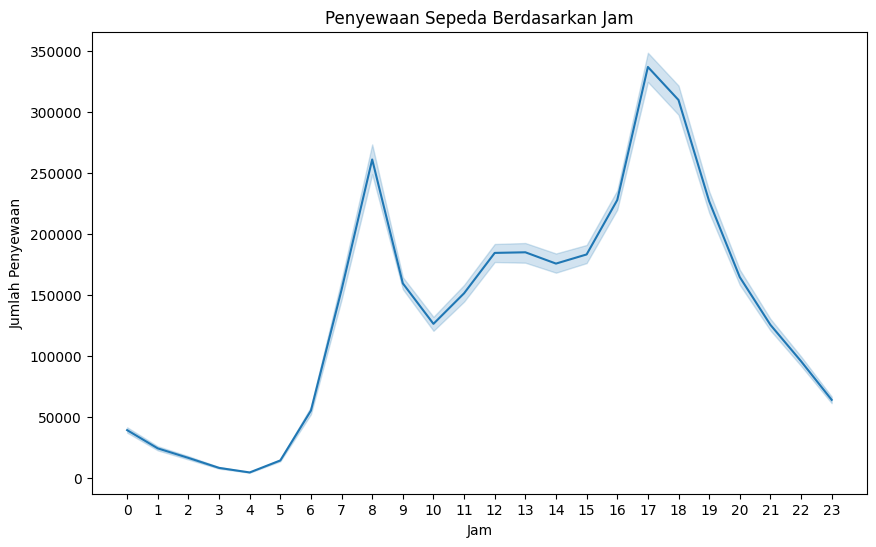

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt', data=hour_data, estimator=sum)
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- Visualisasi bar plot menunjukkan bahwa jumlah penyewaan sepeda pada akhir pekan jauh lebih tinggi dibandingkan hari kerja. Ini menunjukkan adanya peluang untuk meningkatkan fasilitas penyewaan sepeda pada hari kerja.
- Line plot mengindikasikan dua puncak utama dalam jumlah penyewaan sepeda pada jam-jam tertentu, yaitu pagi dan sore. Insight ini dapat membantu dalam merencanakan pengadaan dan pemeliharaan sepeda, serta meningkatkan layanan penyewaan selama jam sibuk.

## Analisis Lanjutan (Opsional)

In [13]:
df_rfm = day_data.copy()

df_rfm['Recency'] = (pd.to_datetime(df_rfm['dteday']).max() - pd.to_datetime(df_rfm['dteday'])).dt.days

df_rfm['Frequency'] = df_rfm['cnt']

df_rfm['Monetary'] = df_rfm['cnt'] * df_rfm['registered']

print(df_rfm[['Recency', 'Frequency', 'Monetary']].head())

   Recency  Frequency  Monetary
0      730        985    644190
1      729        801    536670
2      728       1349   1657921
3      727       1562   2271148
4      726       1600   2428800


#### 1. Recency
mengukur seberapa baru pelanggan melakukan penyewaan sepeda. Pada langkah ini, kami menghitung jumlah hari sejak tanggal terakhir pelanggan menyewa sepeda. Nilai Recency yang lebih rendah menunjukkan bahwa pelanggan baru-baru ini melakukan penyewaan, yang berarti mereka lebih cenderung untuk menyewa lagi di masa depan.

#### 2. Frequency
mengukur seberapa sering pelanggan melakukan penyewaan.

#### 3. Monetary
mengukur total pengeluaran pelanggan. Dalam hal ini, kami menghitung total penyewaan berdasarkan jumlah penyewaan


#### Hasil RFM
Recency: Menunjukkan berapa hari sejak pelanggan terakhir kali menyewa sepeda. Nilai lebih rendah berarti pelanggan lebih baru.

Contoh: Pelanggan dengan Recency 730 hari berarti sudah lama tidak menyewa.
Frequency: Menghitung total penyewaan yang dilakukan oleh pelanggan. Nilai lebih tinggi menunjukkan penggunaan yang lebih sering.

Contoh: Pelanggan dengan Frequency 1600 telah menyewa sepeda sebanyak 1600 kali.
Monetary: Total pengeluaran pelanggan untuk penyewaan. Nilai lebih tinggi menunjukkan pelanggan yang lebih bernilai.

Contoh: Pelanggan dengan Monetary 2428800 telah menghabiskan 2.428.800 untuk penyewaan.
Kesimpulan
Analisis RFM membantu dalam segmentasi pelanggan.
Pelanggan dengan Recency rendah, Frequency tinggi, dan Monetary tinggi adalah yang paling berharga.
Strategi pemasaran dapat difokuskan untuk menarik kembali pelanggan yang jarang menggunakan layanan dan menjaga hubungan dengan pelanggan setia.

## Conclusion

#### Conclusion Pertanyaan 1:
Penggunaan sepeda lebih tinggi pada akhir pekan dibandingkan dengan hari kerja, menunjukkan kecenderungan masyarakat untuk bersepeda untuk rekreasi. Ini menciptakan peluang untuk meningkatkan fasilitas penyewaan sepeda pada hari kerja.

#### Conclusion Pertanyaan 2:
Penyewaan sepeda mencapai puncak penggunaan pada pukul 7-9 pagi dan 5-7 sore, mencerminkan kebiasaan berangkat dan pulang kerja. Pengetahuan ini dapat membantu penyedia layanan merencanakan pengadaan dan pemeliharaan sepeda lebih efisien.